In [1]:
# Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Uploading and reading Dataset 
df = pd.read_csv("Downloads/Country-data.csv")

df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Checking info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
# Checking null values in the dataset
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Principle Component Analysis

In [5]:
# Taking all columns except country for PCA
new_df = df.iloc[:, 1:]
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# Scaling the features
scaler = StandardScaler()
new_data = scaler.fit_transform(new_df)

new_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [7]:
# PCA
pca = PCA(random_state=42)
pca.fit(new_data)
# Components of PCA
print("Components are:", pca.components_)

# Explained Variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Components are: [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61298247 -0.02523614
   0.29

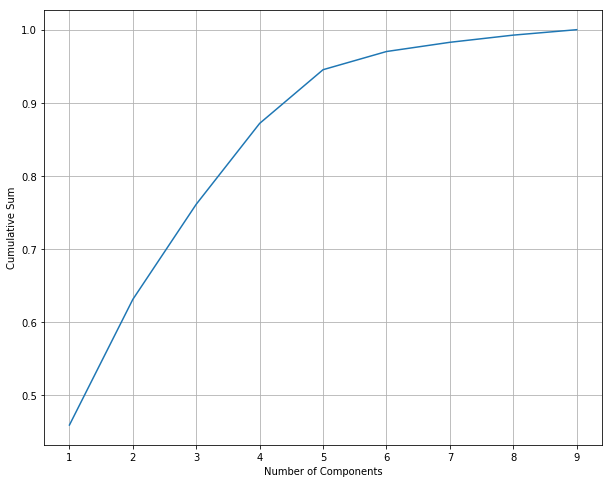

In [8]:
# Scree Plot

var_cum_sum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,8))
plt.plot(range(1,len(var_cum_sum)+1), var_cum_sum)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Sum")
plt.grid(True)
plt.show()


In [9]:
# Dimensionality reduction to 5 principle components 
in_pca = IncrementalPCA(n_components=4)

in_df= in_pca.fit_transform(new_data)

in_df

array([[-2.91378654e+00,  8.83538878e-02,  7.21003195e-01,
         9.96698978e-01],
       [ 4.29357566e-01, -5.87858991e-01,  3.21052324e-01,
        -1.17119280e+00],
       [-2.82988288e-01, -4.46657168e-01, -1.22513541e+00,
        -8.50127000e-01],
       [-2.93096861e+00,  1.69943654e+00, -1.52173450e+00,
         8.75966440e-01],
       [ 1.03198760e+00,  1.30488006e-01,  1.92922430e-01,
        -8.44808058e-01],
       [ 2.84700248e-02, -1.75672051e+00, -7.93519995e-01,
        -5.24863850e-02],
       [-1.02848921e-01, -5.67475881e-01, -2.77668852e-01,
        -1.45832104e+00],
       [ 2.33945555e+00, -1.99811958e+00, -2.37052010e-01,
         1.13249032e+00],
       [ 2.97385881e+00, -7.34849467e-01,  5.48420918e-01,
         1.19256083e+00],
       [-1.80005999e-01, -3.93752233e-01, -8.64255214e-01,
        -4.26656606e-01],
       [ 1.26607427e+00, -6.65087633e-01,  4.53533102e-01,
         5.94788468e-02],
       [ 1.67073708e+00,  5.60394035e-01, -1.02016832e+00,
      

In [10]:
# Teansposing and creating new dataset
in_df = in_df.T

pca_df = pd.DataFrame({"PC1":in_df[0], "PC2":in_df[1], "PC3":in_df[2], "PC4":in_df[3]})

pca_df.head()

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808


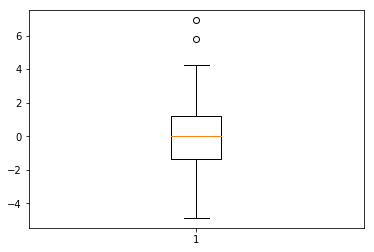

In [11]:
# Outliers Detection and Treatment 

plt.boxplot(pca_df.PC1)
Q1 = pca_df.PC1.quantile(0.05)
Q3 = pca_df.PC1.quantile(0.95)

iqr = Q3-Q1

pca_df2 = pca_df[(pca_df.PC1 >= Q1) & (pca_df.PC1 <= Q3)]

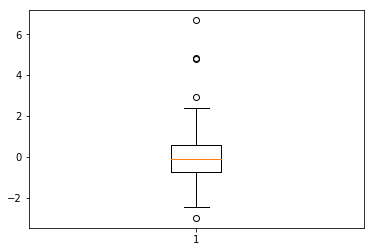

In [12]:
plt.boxplot(pca_df.PC2)
Q1 = pca_df.PC2.quantile(0.05)
Q3 = pca_df.PC2.quantile(0.95)

iqr = Q3-Q1

pca_df2 = pca_df[(pca_df.PC2 >= Q1) & (pca_df.PC2 <= Q3)]

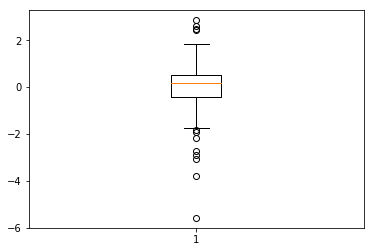

In [13]:
plt.boxplot(pca_df.PC3)
Q1 = pca_df.PC3.quantile(0.05)
Q3 = pca_df.PC3.quantile(0.95)

iqr = Q3-Q1

pca_df2 = pca_df[(pca_df.PC3 >= Q1) & (pca_df.PC3 <= Q3)]

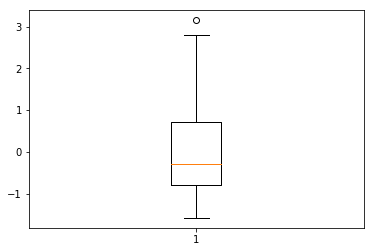

In [14]:
plt.boxplot(pca_df.PC4)
Q1 = pca_df.PC4.quantile(0.05)
Q3 = pca_df.PC4.quantile(0.95)

iqr = Q3-Q1

pca_df2 = pca_df[(pca_df.PC4 >= Q1) & (pca_df.PC4 <= Q3)]

In [15]:
# Checking the final shape of the Principle components dataset
print(pca_df2.shape)
print(pca_df.shape)

(149, 4)
(167, 4)


We are not loosing much of data in outliers treatment so we will use the new dataset

### K-Means Clustering

In [16]:
# Hopkins score to check if the dataset is suitable for clustering

# Libraries required for Calculating Hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

# Code for Hopkins statistics 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

hopkins(pca_df2)

0.745807923061222

As Hopkins statistics score is well above 0.5 the dataset is good for K-Means clustering

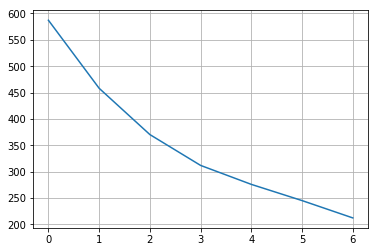

In [17]:
# Elbow curve to find optimal number of K
ssd = []
n_range = [2,3,4,5,6,7,8]

for i in n_range:
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=100)
    kmeans.fit(pca_df2)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.grid(True)
plt.show()

In [18]:
# Silhouette score

range_clusters = [2,3,4,5,6,7,8]

for i in range_clusters:
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=100, init='k-means++')
    kmeans.fit(pca_df2)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(pca_df2, cluster_labels)
    
    print("For No. of clusters{0} the silhouette score is {1}".format(i, silhouette_avg))

For No. of clusters2 the silhouette score is 0.34345173631527426
For No. of clusters3 the silhouette score is 0.3130629450849187
For No. of clusters4 the silhouette score is 0.3283707641364483
For No. of clusters5 the silhouette score is 0.29608368595741513
For No. of clusters6 the silhouette score is 0.30451344057540475
For No. of clusters7 the silhouette score is 0.3003985302224559
For No. of clusters8 the silhouette score is 0.2930525317250108


In [19]:
# Clustering with 4 clusters

clus_model = KMeans(n_clusters=4, init='k-means++', max_iter=100, random_state=100)
clus_model.fit(pca_df2)

pca_df2['Cluster_ID'] = clus_model.labels_

pca_df2.head()

,PC1,PC2,PC3,PC4,Cluster_ID
0,-2.913787,0.088354,0.721003,0.996699,2
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,2
4,1.031988,0.130488,0.192922,-0.844808,0
5,0.028470,-1.756721,-0.793520,-0.052486,0


In [20]:
# Combining the dataset with original dataset

df_final = pd.concat([df, pca_df2], axis=1)

df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,2.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,NaN,NaN,NaN,NaN,NaN
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966,2.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,0.0


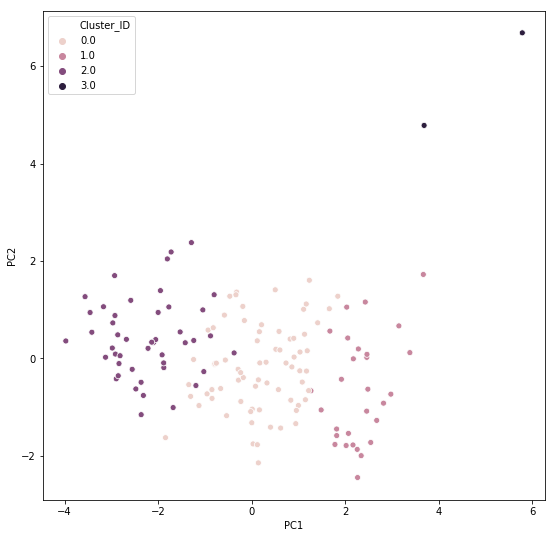

In [21]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_ID', data=df_final)
plt.show()

In [22]:
# Dropping the nan values 
df_final = df_final.dropna()

df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.913787,0.088354,0.721003,0.996699,2.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.282988,-0.446657,-1.225135,-0.850127,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.930969,1.699437,-1.521734,0.875966,2.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.031988,0.130488,0.192922,-0.844808,0.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.028470,-1.756721,-0.793520,-0.052486,0.0


#### Analysis on K-Means Clustering

In [23]:
# Dropping the Principle Components
df_final = df_final.drop(["PC1","PC2","PC3","PC4"], axis=1)
df_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.0


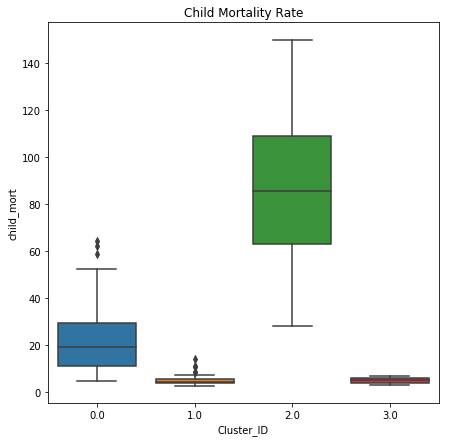

In [24]:
# Box Plots:
plt.figure(figsize=(7,7))

sns.boxplot(y='child_mort', x='Cluster_ID', data=df_final)
plt.title("Child Mortality Rate")
plt.show()


In the following Box Plot:
- We see the cluster 0 and cluster 2 have high number of Child Mortality rate and large number of countries are present in these 2 clusters. 
- The ones who requires financial aid will be the ones with higher child mortality rate, more than 50% or 75%.

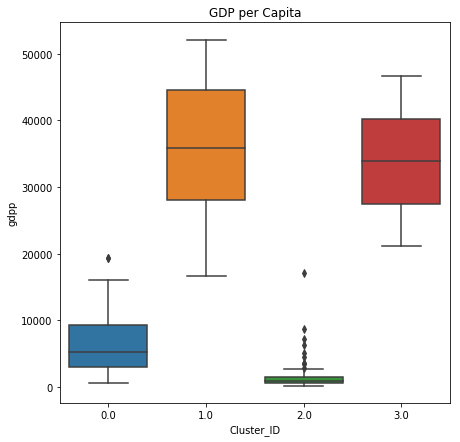

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(y='gdpp', x='Cluster_ID', data=df_final)
plt.title("GDP per Capita")
plt.show()

From the following box plot:
- The clusters 1 and 3 shows the countries with high gdp and clusters 0 and 2 shows countries with low GDP.
- Most of the countries in the cluster 0 will requiere the financial aid and all the countries in cluster 2 will require financial aid.

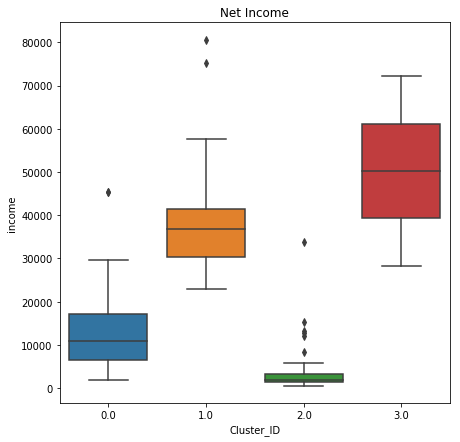

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(y='income', x='Cluster_ID', data=df_final)
plt.title("Net Income")
plt.show()


From the following box plot of income:
- Cluster 1 and 3 are the countries which have quite high gdp as compared to cluster 0 and 2.
- In cluster 0 countries below the median and almost all countries in cluster 2 will require financial aid

In [27]:
# Let's create dataset of the countries that require financial aid

q_child_mort = df_final["child_mort"].quantile(0.85)
q_income = df_final["income"].quantile(0.15)
q_gdpp = df_final["gdpp"].quantile(0.15)

country = df_final[(df_final.child_mort>=q_child_mort) & (df_final.income<=q_income) & (df_final.gdpp<=q_gdpp)]
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2.0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2.0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2.0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2.0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2.0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,2.0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,2.0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,2.0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,2.0


### Heriarchical Clustering

In [28]:
# Dropping columns for Hierarchical clustering
heir_data = pca_df2.drop('Cluster_ID', axis=1)

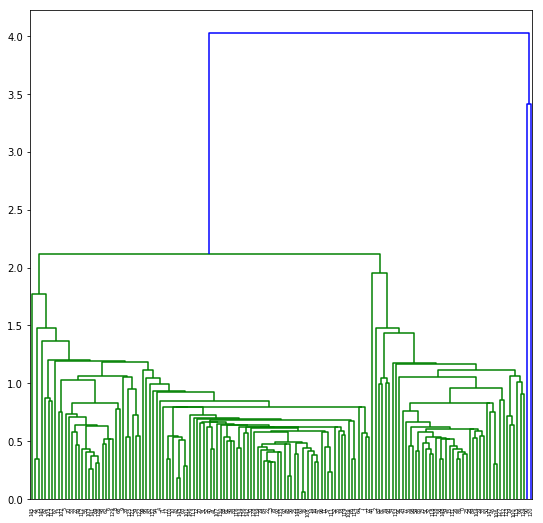

In [29]:
plt.figure(figsize=(9,9))
merge = linkage(pca_df2, method='single', metric='euclidean')
dendrogram(merge)
plt.show()

In [30]:
# from above plot we can say optimal number of clusters be 2

cluster_labels = cut_tree(merge, n_clusters=2).reshape(-1,)

sing_heir = heir_data

sing_heir['Cluster_Labels'] = cluster_labels

sing_heir.head()

,PC1,PC2,PC3,PC4,Cluster_Labels
0,-2.913787,0.088354,0.721003,0.996699,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,0
5,0.028470,-1.756721,-0.793520,-0.052486,0


In [31]:
# Combing this data set with original dataset for analysis

sing_final = pd.concat([df, sing_heir['Cluster_Labels']], axis=1)
sing_final = sing_final.dropna()
sing_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.0


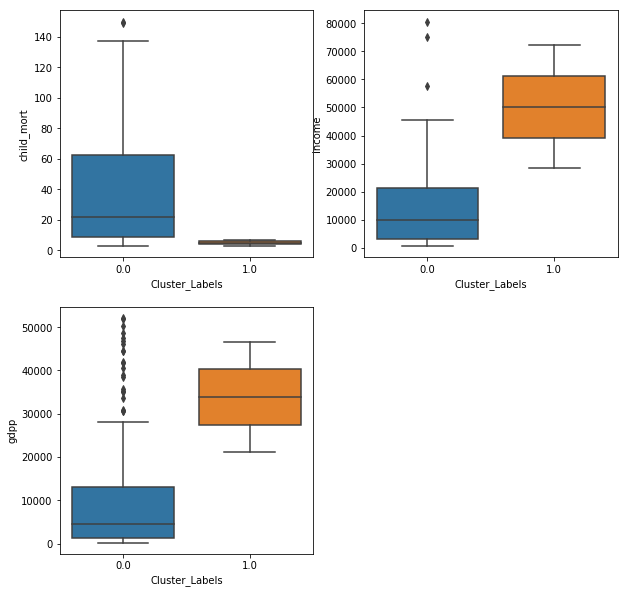

In [32]:
# Analysis for Single Linkage Heirarchichal clustering

plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.boxplot(y='child_mort', x='Cluster_Labels', data=sing_final)

plt.subplot(2,2,2)
sns.boxplot(y='income', x='Cluster_Labels', data=sing_final)

plt.subplot(2,2,3)
sns.boxplot(y='gdpp', x='Cluster_Labels', data=sing_final)

plt.show()

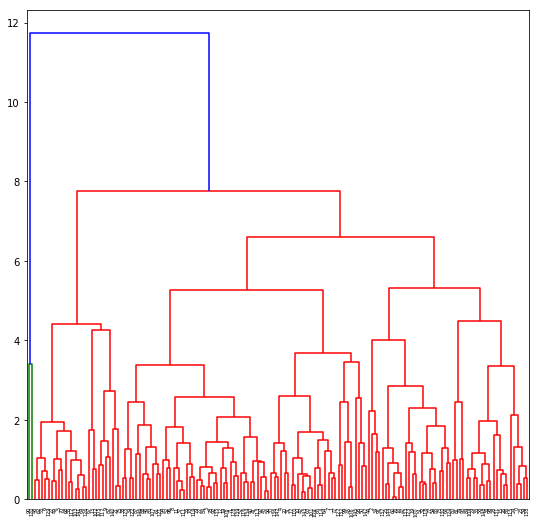

In [33]:
# Complete Linkage 
plt.figure(figsize=(9,9))
y = linkage(heir_data, method='complete', metric='euclidean')
dendrogram(y)
plt.show()


In [34]:
# Clusters from Complete Linkage
clusters = cut_tree(y, n_clusters=3).reshape(-1,)

com_data = heir_data

com_data['Cluster_Labels'] = clusters

com_data.head()

,PC1,PC2,PC3,PC4,Cluster_Labels
0,-2.913787,0.088354,0.721003,0.996699,0
2,-0.282988,-0.446657,-1.225135,-0.850127,0
3,-2.930969,1.699437,-1.521734,0.875966,0
4,1.031988,0.130488,0.192922,-0.844808,0
5,0.028470,-1.756721,-0.793520,-0.052486,0


In [35]:
# Final Dataset of clustering 
com_final = pd.concat([df, com_data['Cluster_Labels']], axis=1)
com_final = com_final.dropna()
com_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,0.0


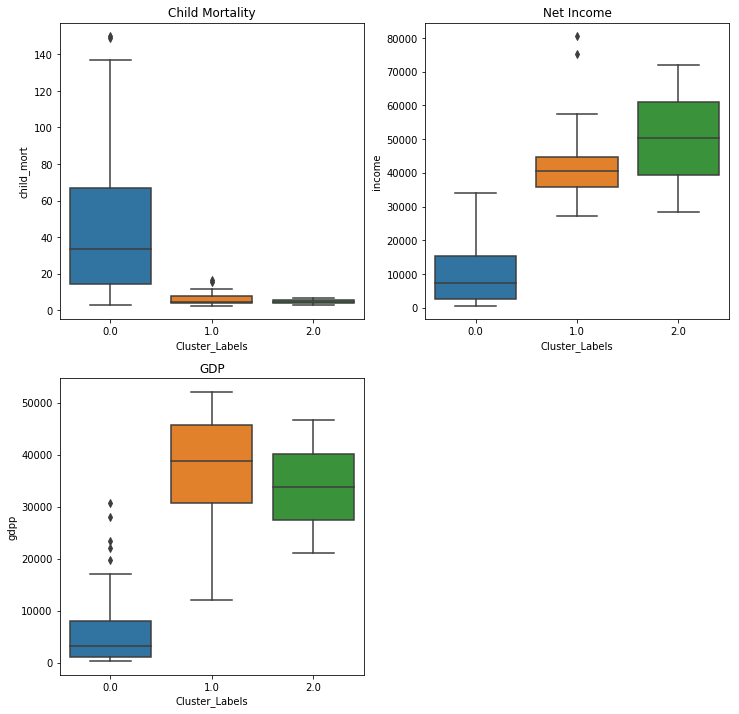

In [36]:
# Analysis for Complete Linkage Heirarchichal clustering

plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.boxplot(y='child_mort', x='Cluster_Labels', data=com_final)
plt.title("Child Mortality")

plt.subplot(2,2,2)
sns.boxplot(y='income', x='Cluster_Labels', data=com_final)
plt.title("Net Income")

plt.subplot(2,2,3)
sns.boxplot(y='gdpp', x='Cluster_Labels', data=com_final)
plt.title("GDP")

plt.show()

For Child Mortality box plot:
- Cluster 0 have and maximum number of countries and higher child mortality rate than other 2 clusters
- Not much of countries have higher mortality rate

For Net Income plot:
- Cluster 1 and 2 have quite higher Net income than cluster 0
- Most of the countries in cluster 0 will require financial aid

For GDP plot:
- Cluster 1 and 2 have higher GDP than cluster 0
- Most of the countries are below 10,000 in cluster 0 they may require aid.

In [37]:
# Countries based on above analysis
t_child = com_final["child_mort"].quantile(0.75)
t_income = com_final["income"].quantile(0.2)
t_gdp = com_final["gdpp"].quantile(0.2)

hierarchy = com_final[(com_final.child_mort>=t_child) & (com_final.income<=t_income) & (com_final.gdpp<=t_gdp)]

hierarchy

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Labels
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0.0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,0.0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0.0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,0.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0.0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0.0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,0.0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0.0
56,Gambia,80.3,23.80,5.69,42.7,1660,4.300,65.5,5.71,562,0.0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,0.0


In [38]:
# Countries from KMeans algo
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_ID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2.0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2.0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2.0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2.0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,2.0
63,Guinea,109.0,30.30,4.93,43.2,1190,16.100,58.0,5.34,648,2.0
64,Guinea-Bissau,114.0,14.90,8.50,35.2,1390,2.970,55.6,5.05,547,2.0
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327,2.0
94,Malawi,90.5,22.80,6.59,34.9,1030,12.100,53.1,5.31,459,2.0


From KMeans
#Final List of Countries that are in Dire need of aid:
- Afganistan
- Benin
- Burkina Faso
- Burundi
- Central African Republic
- Congo, Democratic Republic
- Guinea
- Guinea-Bissau
- Liberia
- Malawi
- Mali
- Mozambique
- Niger
- Togo

From Heirarchical Clustering 
#Final List of countries in need of aid:
- Afganistan
- Benin
- Burkina Faso
- Burundi
- Central African Republic
- Chad
- Comoros
- Congo, Dem. Rep
- Gambia
- Guinea
- Guinea-Bissau
- Liberia
- Madagascar
- Malawi
- Mali
- Mozambique
- Niger
- Rawanda 
- Senegal
- Tanzania 
- Togo 
- Uganda